
# Project: Investigate a Dataset - [TMDb Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset used for this report will be the TMDb Movie data set which contains information for about 10,000 movies collected from The Movie Database. 

The dataset has the following columns:
- id
- IMDB ID
- Popularity
- budget
- revenue
- original title
- cast
- movie homepage
- director
- tagline
- keywords
- overview
- runtime
- genres
- production companies
- release date
- vote count
- vote average
- release year
- budget adjusted (2010 dollars)
- revenue adjusted (2010 dollars)

The budget, revenue, popularity, director, runtime, and genre columns will be of main focus in this report as they will tell us unique details for each movie, director and year.


### Question(s) for Analysis

The following questions will be addressed through data exploration:
- What are the differences between movies that are more popular and less popular?
- What characteristics do popular directors share?

Data exploration will also compare the several variables mentioned above to extract further insights to answer the 2 questions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
!pip3 install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load movie data 
movies = pd.read_csv("tmdb-movies.csv")

In [4]:
# Preview data
movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Initial Investigation
> Initally investigate the data and look for any problems that affect the cleanliness such as nulls, duplicates or wrong data types.

In [5]:
# Examine data types for each column
movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# Check number of duplicated rows in the data
movies.duplicated().sum()

1

In [7]:
# Check number of null values for each column
movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Initial Investigation Recap
> For datatypes, it seems like both the budget_adj and revenue_adj are not in the correct datatype as their values are getting truncated when displaying the data. There is also one row of duplicated data that will need to be removed. As for null values, 9 columns have null values that will need to be dropped.


### Data Cleaning
> The following section will focus on addressing the 3 issues identified in the initial investigation step (wrong data type, duplicates, null values).

We can start our data cleaning process by first addressing the duplicates. Using the drop_duplicates() function, any duplicated rows will be removed from the data set. 

In [8]:
movies = movies.drop_duplicates()

Recheck the data set to see if the duplicates are still there

In [9]:
movies.duplicated().sum()

0

Second we address the multiple null values in the data set by dropping them using the dropna() function

In [10]:
movies = movies.dropna()

Recheck to see if there are still any null values for each column

In [11]:
movies.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Lastly we need to alter the data type for budget_adj and revenue_adj so that the values show correctly. We can use the astype() function and change them from float to int.

In [12]:
movies = movies.astype({"budget_adj":'int', "revenue_adj":'int'})

Check that the datatypes have been changed and see if the values show correctly

In [13]:
movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj                int64
revenue_adj               int64
dtype: object

In [14]:
movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939,1392445892


<a id='eda'></a>
## Exploratory Data Analysis



### What are the differences between movies that are more popular and less popular?

First, to find out what an average popularity rating for a movie is, we need to first get the average and split the dataset into 2 separate sets (under and above average).

In [15]:
# Find the 50% percentile for popularity
movies.popularity.describe()

count    1992.000000
mean        1.316763
std         1.873563
min         0.000620
25%         0.384079
50%         0.774223
75%         1.538639
max        32.985763
Name: popularity, dtype: float64

In [16]:
# Create the two sub dataset for above and below the threshold
under = movies.query('popularity < 0.774223')
over = movies.query('popularity > 0.774223')

In [17]:
# Examine the 2 sub data sets
under.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
195,331781,tt2870648,0.738404,0,8413144,Amy,Amy Winehouse|Mark Ronson|Tony Bennett|Pete Do...,http://www.amy-movie.com/,Asif Kapadia,The girl behind the name.,...,"A documentary on the life of Amy Winehouse, th...",128,Documentary|Music,On The Corner Films|Universal Music,7/3/15,345,7.5,2015,0,7740089


In [18]:
over.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939,1392445892


In [19]:
# Get the summary stats for the 2 sub data sets

In [20]:
under.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,996.000000,996.000000,9.960000e+02,9.960000e+02,996.000000,996.000000,996.000000,996.000000,9.960000e+02,9.960000e+02
mean,80258.657631,0.389580,1.123657e+07,2.049775e+07,101.516064,118.079317,5.975402,2008.339357,1.200649e+07,2.239424e+07
std,98418.830469,0.196059,2.548500e+07,6.727134e+07,35.232334,274.114547,0.926216,6.391679,2.656391e+07,7.137678e+07
min,17.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,13003.750000,0.238709,0.000000e+00,0.000000e+00,90.000000,23.000000,5.400000,2007.000000,0.000000e+00,0.000000e+00
50%,38931.500000,0.383948,1.300000e+05,7.255500e+03,98.000000,52.000000,6.000000,2010.000000,1.366645e+05,7.030500e+03
75%,94432.500000,0.539070,1.200000e+07,1.365714e+07,107.250000,124.250000,6.600000,2012.000000,1.260664e+07,1.547365e+07
max,414419.000000,0.773934,4.250000e+08,1.123747e+09,705.000000,4368.000000,8.100000,2015.000000,4.250000e+08,1.089358e+09


In [21]:
over.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,996.000000,996.000000,9.960000e+02,9.960000e+02,996.000000,996.000000,996.000000,996.000000,9.960000e+02,9.960000e+02
mean,63045.646586,2.243946,5.786190e+07,2.099328e+08,110.564257,1169.154618,6.381827,2007.254016,6.054103e+07,2.380839e+08
std,85048.410363,2.294450,5.821991e+07,2.731606e+08,20.685462,1326.502509,0.784806,8.520312,5.814598e+07,3.212532e+08
min,11.000000,0.774511,0.000000e+00,0.000000e+00,5.000000,11.000000,3.300000,1962.000000,0.000000e+00,0.000000e+00
25%,4979.000000,1.077551,1.500000e+07,3.891887e+07,97.000000,325.000000,5.900000,2006.000000,1.836508e+07,3.946475e+07
50%,23668.500000,1.539003,4.000000e+07,1.137115e+08,108.000000,657.500000,6.400000,2010.000000,4.065602e+07,1.236100e+08
75%,76298.250000,2.577027,8.000000e+07,2.685134e+08,122.000000,1531.750000,6.900000,2012.000000,8.667510e+07,3.107376e+08
max,378373.000000,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


We can see that on average, some of the variables are quite consistent between the 2 datasets like runtime, revenue and release years. But there are some like budget, and vote count that are quite different.

#### Are more popular movies produced more recently?

Investigate whether more popular movies are produced in recent times due to better technology and filming techniques

In [22]:
# Count number of movies for each year and plot them
under_year = under.groupby('release_year').size().reset_index(name='counts')
under_year

,release_year,counts
0,1961,1
1,1970,1
2,1971,2
3,1976,2
4,1978,2
5,1979,1
6,1980,1
7,1981,2
8,1983,2
9,1984,2


In [23]:
# Count number of movies for each year and plot them
over_year = over.groupby('release_year').size().reset_index(name='counts')
over_year

,release_year,counts
0,1962,1
1,1963,1
2,1964,2
3,1965,1
4,1967,1
5,1969,1
6,1971,2
7,1972,1
8,1973,2
9,1974,2


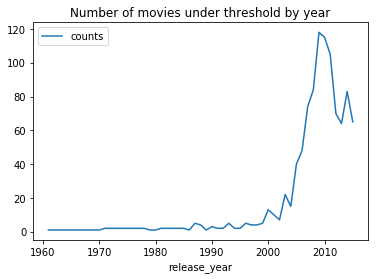

In [24]:
# Plot number of movies per year for under and over average
under_year.plot(x='release_year', y='counts', kind='line', title='Number of movies under threshold by year')

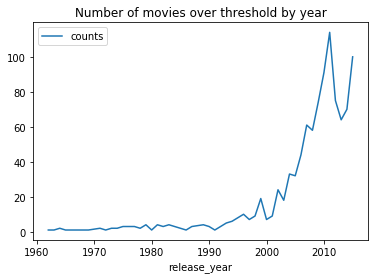

In [25]:
over_year.plot(x='release_year', y='counts', kind='line', title='Number of movies over threshold by year')

We can see that both under and over average movies being produced increase in time greatly. But one of the differences between the two is that after the peak around 2010, the number of more popular movies increased while the number of less popilar movies decreased after the 2010 peak.

#### Do more popular movies have a higher budget allocated?

Lets see if the budget allocated for each film affects the popularity, such as whether or not more popular films receive higher budgets?

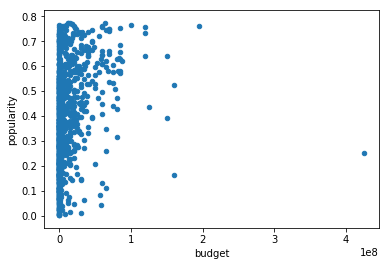

In [26]:
# Plot the relationship between budget and popularity
under.plot(x='budget', y='popularity', kind='scatter')

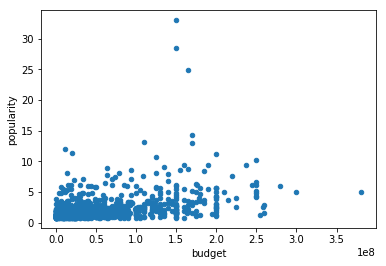

In [27]:
over.plot(x='budget', y='popularity', kind='scatter')

### What characteristics do popular directors share?

In [28]:
# Get the top 3 directors from the dataset by amount of films directed
directors = movies.groupby('director').count().sort_values('id', ascending = False).head(3)
directors

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
director,,,,,,,,,,,,,,,,,,,,
John Carpenter,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Steven Soderbergh,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Steven Spielberg,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


We can see that based on the most movies directed,John Carpenter, Steven Soderbergh and Steven Spielberg are the top 3 directors with most movies directed.

#### Do these 3 directors produce several movies in a year to get such high count?

Since all 3 directors have such high count in terms of movies directed, lets see if they are able to acheive such high numbers by directing multiple movies within a year.

In [29]:
# Create a datafram with just the movies by the top 3 directors
top_directors = ["John Carpenter", "Steven Soderbergh", "Steven Spielberg"]
sub_movies = movies.query('director in @top_directors')
sub_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1460,11323,tt1130080,1.018005,22000000,35424826,The Informant!,Matt Damon|Scott Bakula|Joel McHale|Melanie Ly...,http://theinformantmovie.warnerbros.com/,Steven Soderbergh,Based on a tattle-tale.,...,A rising star at agri-industry giant Archer Da...,108,Comedy|Crime|Drama|Thriller,Section Eight|Groundswell Productions|Warner B...,9/18/09,170,6.0,2009,22360809,36005808
1545,8880,tt0374569,0.566149,40000000,0,Che: Part Two,Benicio del Toro|Catalina Sandino Moreno|Frank...,http://www.ifcfilms.com/films/che,Steven Soderbergh,A revolutionary life.,...,"After the Cuban Revolution, Che is at the heig...",131,Drama|History|War,Wild Bunch|Telecinco|Laura Bickford Production...,1/24/09,86,6.4,2009,40656017,0
2048,45657,tt1369706,0.745434,10000000,498974,The Ward,Lyndsy Fonseca|Amber Heard|Danielle Panabaker|...,http://www.theofficialjohncarpenter.com/the-ward/,John Carpenter,Only Sanity Can Keep You Alive,...,A thriller centered on an institutionalized yo...,88,Horror|Thriller,North by Northwest Entertainment|Premiere Pict...,9/13/10,166,5.9,2010,10000000,498974
2641,161,tt0240772,2.642249,85000000,450717150,Ocean's Eleven,George Clooney|Brad Pitt|Matt Damon|Andy GarcÃ...,http://www.warnerbros.co.uk/movies/oceans-eleven,Steven Soderbergh,Are you in or out?,...,"Less than 24 hours into his parole, charismati...",116,Thriller|Crime,Village Roadshow Pictures|Section Eight|NPV En...,12/7/01,2645,7.0,2001,104676489,555052814
2742,10016,tt0228333,0.451722,28000000,14010832,Ghosts of Mars,Natasha Henstridge|Ice Cube|Jason Statham|Clea...,http://www.theofficialjohncarpenter.com/ghost-...,John Carpenter,Terror is the same on any planet.,...,Melanie Ballard (Natasha Henstridge) is a hard...,98,Action|Horror|Science Fiction,Screen Gems|Storm King Productions|Animationwerks,8/24/01,135,4.6,2001,34481667,17254173
2879,217,tt0367882,3.161670,185000000,786636033,Indiana Jones and the Kingdom of the Crystal S...,Harrison Ford|Cate Blanchett|Shia LaBeouf|Ray ...,http://www.indianajones.com/site/index.html,Steven Spielberg,The adventure continues . . .,...,"Set during the Cold War, the Soviets â€“ led b...",122,Adventure|Action,Lucasfilm|Paramount Pictures,5/21/08,1537,5.6,2008,187365527,796694459
3397,17578,tt0983193,2.234300,130000000,371940071,The Adventures of Tintin,Jamie Bell|Andy Serkis|Daniel Craig|Nick Frost...,http://www.us.movie.tintin.com/,Steven Spielberg,"This year, discover how far adventure will tak...",...,"Intrepid young reporter, Tintin and his loyal ...",107,Adventure|Animation|Action|Family|Mystery,Paramount Pictures|Columbia Pictures|WingNut F...,10/25/11,1448,6.6,2011,126021745,360557976
3414,57212,tt1568911,1.592819,66000000,177584879,War Horse,Tom Hiddleston|Benedict Cumberbatch|Toby Kebbe...,http://www.warhorsemovie.com/,Steven Spielberg,Separated by War. Tested by Battle. Bound by F...,...,Follows a young man named Albert and his horse...,146,Drama|War,DreamWorks SKG|Amblin Entertainment|Reliance E...,12/25/11,611,6.9,2011,63980270,172150434
3467,39538,tt1598778,1.045866,60000000,135458097,Contagion,Matt Damon|Gwyneth Paltrow|Kate Winslet|Jude L...,http://contagionmovie.warnerbros.com/,Steven Soderbergh,Nothing spreads like fear,...,Contagion follows the rapid progress of a leth...,106,Drama|Thriller|Science Fiction,Double Feature Films|Regency Enterprises|Warne...,9/8/11,852,6.1,2011,58163882,131312814
4391,77930,tt1915581,1.974672,7000000,167221571,Magic Mike,Channing Tatum|Matthew McConaughey|Olivia Munn...,http://magicmikemovie.warnerbros.com,Steven Soderbergh,Work all day. Work it all night.,...,"Mike, an experienced stripper, takes a younger...",110,Drama|Comedy,Nick Wechsler Productions|Extension 765,6/28/12,664,6.1,2012,6648209,158817730


In [52]:
# Create subset of movies for each director
# Count number of movies directed per year for each director
carpenter = sub_movies.query('director ==  "John Carpenter"')
carp_freq = carpenter.groupby('release_year').count()
carp_freq = carp_freq.reset_index()

In [31]:
soderbergh = sub_movies.query('director ==  "Steven Soderbergh"')
soder_freq = soderbergh.groupby('release_year').count()
soder_freq = soder_freq.reset_index()

In [32]:
spielberg = sub_movies.query('director ==  "Steven Spielberg"')
spiel_freq = spielberg.groupby('release_year').count()
spiel_freq = spiel_freq.reset_index()

Let's start with visualizing the amount of movies directed per year for each director

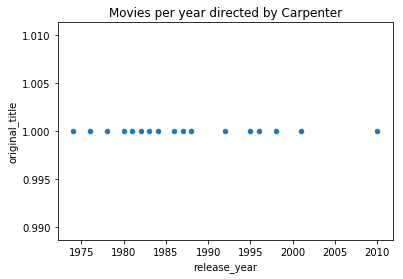

In [64]:
carp_freq.plot(x='release_year', y='original_title', kind='scatter', title='Movies per year directed by Carpenter')

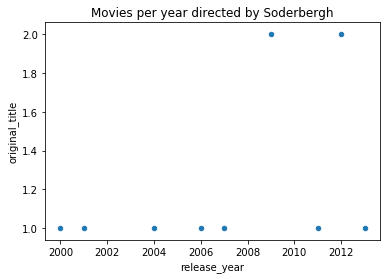

In [65]:
soder_freq.plot(x='release_year', y='original_title', kind='scatter', title='Movies per year directed by Soderbergh')

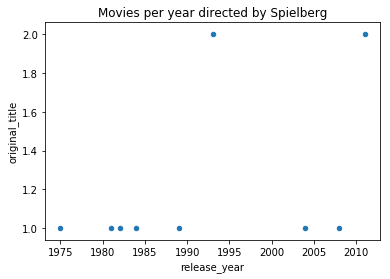

In [66]:
spiel_freq.plot(x='release_year', y='original_title', kind='scatter', title='Movies per year directed by Spielberg')

It seems that despite being directors with most movies directed, on average only 1 movie is directed by them per given year. Both Steven Soderbergh and Steven Spielberg have had 2 years where they did end up directing up to 2 movies but this occasion seems rather rare.

Another interesting thing that all 3 directors share in common is that they all have period of gaps where they did not direct any movies. Those being after 2000-2010 for Carpenter, 2001-2004 for Soderbergh and 1993-2004 for Spielber.

#### What genres do these 3 directors have in common?

Next, we want to find out if these directors share the same genres making them so popular.

In [53]:
# Split the genres into single category for each director using their sub data frames
carpenter.genres = carpenter.genres.str.split('|')                                                               
carpenter = carpenter.explode('genres')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [54]:
soderbergh.genres = soderbergh.genres.str.split('|')                                                               
soderbergh = soderbergh.explode('genres')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [55]:
spielberg.genres = spielberg.genres.str.split('|')                                                               
spielberg = spielberg.explode('genres')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Once we've split the genres, we can count the number of each genre for each director.

In [56]:
# Count the frequency for each genre
carp_genre_freq = carpenter.groupby('genres').count()
carp_genre_freq = carp_genre_freq.reset_index()

In [57]:
soder_genre_freq = soderbergh.groupby('genres').count()
soder_genre_freq = soder_genre_freq.reset_index()

In [58]:
spiel_genre_freq = spielberg.groupby('genres').count()
spiel_genre_freq = spiel_genre_freq.reset_index()

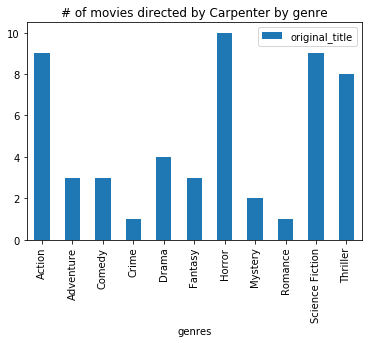

In [67]:
# Plot the frequencies for the genres
carp_genre_freq.plot(x='genres', y='original_title', kind='bar', title='# of movies directed by Carpenter by genre')

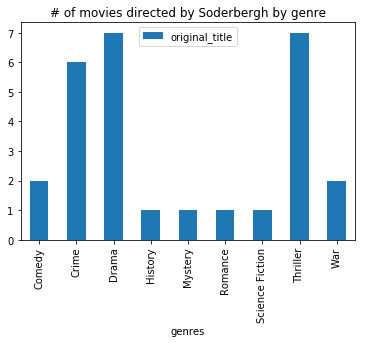

In [68]:
soder_genre_freq.plot(x='genres', y='original_title', kind='bar', title='# of movies directed by Soderbergh by genre')

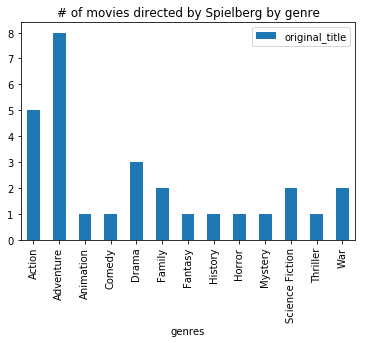

In [69]:
spiel_genre_freq.plot(x='genres', y='original_title', kind='bar', title='# of movies directed by Spielberg by genre')

From the barcharts, we see that Spielberg has the most diverse types of genres followed by Carpenter. We also see that all 3 directors are very different in terms of the genres they focus on. For example, Spielberg is heavily concentrated on Adventure movies, Soderbergh is focused on Drama and Thriller while Carpenter is more focused on the Horror and Sci Fi genres. An interesting observation here is that Carpenter tends to be a mix of both Spielberg and Soderbergh as Carpenter has a lot of movies in Thriller and Action.

We can also see that Spielberg is heavily concentrated on action and fast paced movies, while Soderbergh is heavily oriented around suspenseful genres. Carpenter tends to be a mix of both and is the only director that heavily directs Sci Fi related movies.

<a id='conclusions'></a>
## Conclusions

 

In terms of movie popularity, more popular movies on average had higher amount of budget allocated to them. Movies with higher popularity also saw an increase in production post 2010 while less popular movies saw a decline post 2010. Although both less popular and more popular movies had revenues that did not differ to drastically, more research and exploration is needed to see whether other variables in the list affect the revenue besides popularity.

In the case of director popularity, the top 3 directors that had the highest amount of movies directed were Carpenter, Soderbergh and Spielberg. Though they had the most movies directed, all 3 directors did not aggresively direct movies during the year. Carpenter only directed 1 movie a year while Soderbergh and Spielberg had a few years where they directed at most 2 movies though this was quite rare. All 3 top directors also had gaps in between years where they did not direct any movie. Lastly, all 3 directors focused on separate movie genres with Carpenter focusing on mainly Action, Sci Fi and suspenseful films. Soderbergh focused on more suspensful films and also had the least amount of diversification in terms of genre. Spielberg is heavily involved in action, adventure type films. Additional research can be done on this topic by looking at other variables that may set the 3 directors apart such as total revenue generated. Redefining what top 3 means could also give us new insights.

There are some limitations to this report. Firstly being that the popularity  cutoff is taken using the 50th percentile. The data would look very different if another threshold was used such as the mean. Secondly there is a data limitation as some null values were dropped or replaced with 0s which may skew or change certain numeric columns such as budget or revenue.


In [71]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0